<a href="https://www.kaggle.com/code/jahangirhussen/predicting-heart-disease-accuracy-99?scriptVersionId=240582050" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <span style="color: #4CAF50;"> Heart Disease Prediction Model</span>

This project focuses on building a model to predict heart disease using various machine learning algorithms. The project explores data preprocessing, model training, evaluation, and visualization techniques to achieve the best possible model accuracy.


## Libraries and Modules Used

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-collect-from-kaggle-csv/heart_collect_from_kaggle .csv


# Load the dataset

In [3]:
df = pd.read_csv('/kaggle/input/heart-collect-from-kaggle-csv/heart_collect_from_kaggle .csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# Histogram for numerical columns

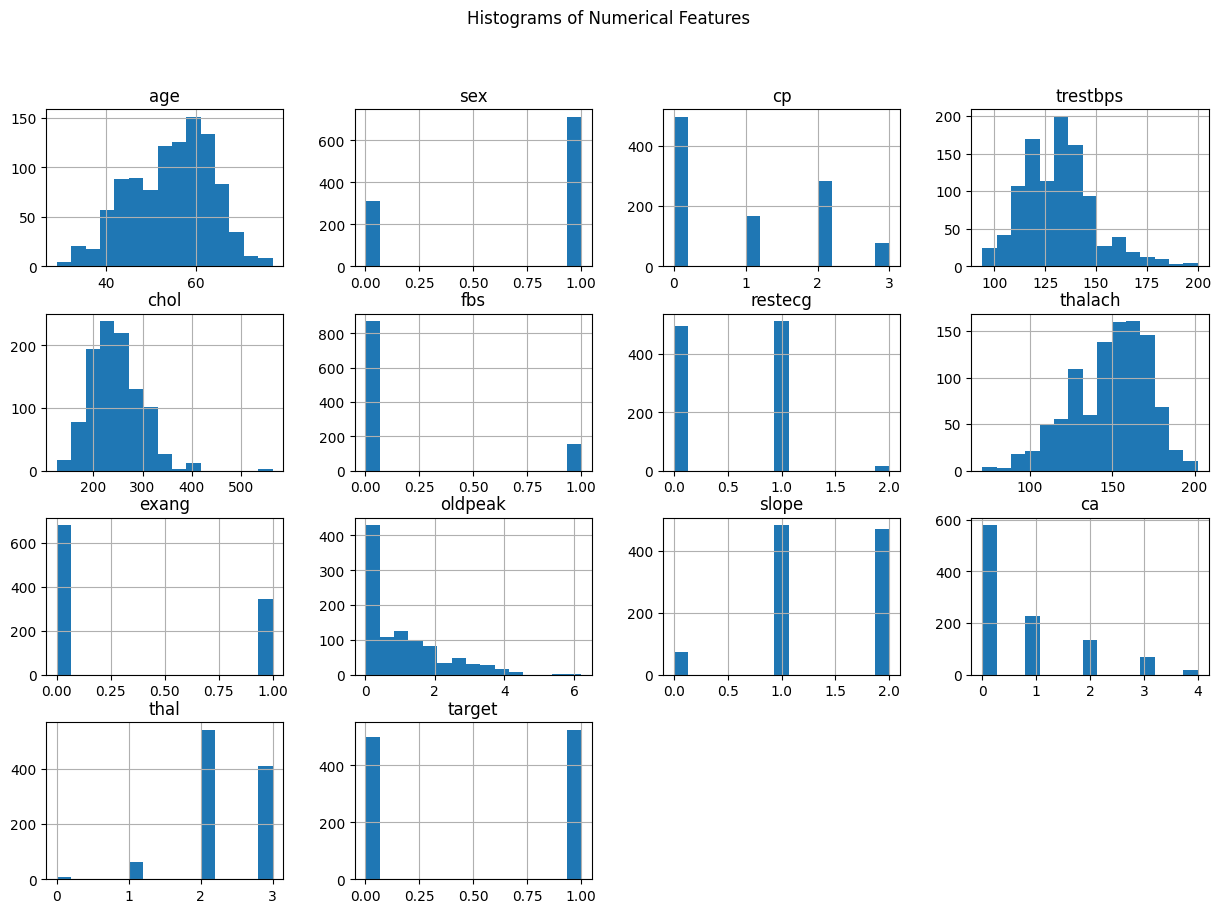

In [7]:
df.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Boxplot for numerical features (Checking for outliers)

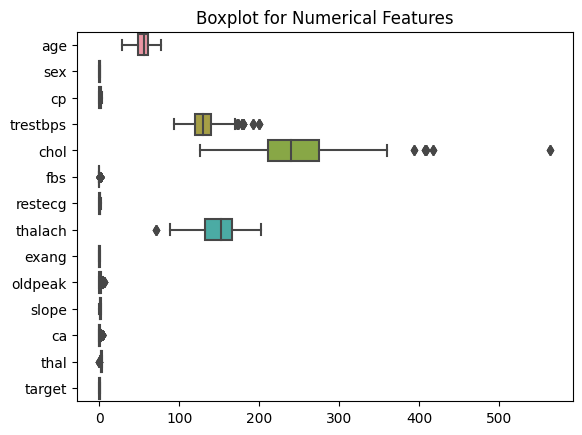

In [8]:
sns.boxplot(data=df, orient='h')
plt.title('Boxplot for Numerical Features')
plt.show()


# Compute the correlation matrix

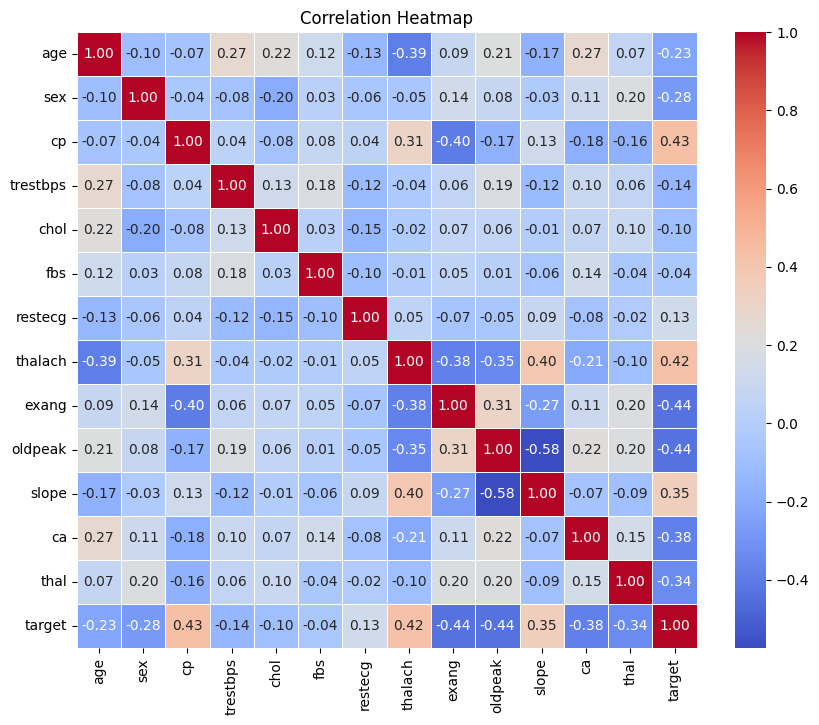

In [9]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Convert non-numeric data to numeric data

In [10]:
df = pd.read_csv('/kaggle/input/heart-collect-from-kaggle-csv/heart_collect_from_kaggle .csv')

le = LabelEncoder()
cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
df[cols] = df[cols].apply(lambda col: le.fit_transform(col))

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['cp'] = le.fit_transform(df['cp'])
df['fbs'] = le.fit_transform(df['fbs'])
df['restecg'] = le.fit_transform(df['restecg'])
df['exang'] = le.fit_transform(df['exang'])
df['slope'] = le.fit_transform(df['slope'])
df['thal'] = le.fit_transform(df['thal'])
df.head()

## Notes on Variables
- **X**: Represents the **value**.
- **y**: Represents the **target**.
These variables are commonly used in algorithms where `X` holds the given data, and `y` is the expected result.

In [11]:
X=df.drop(['target'], axis =1)
y=df['target']

## Train-Test Split
To split the dataset into training and testing sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🚀 Simple Imputer for Missing Values

In [13]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# 🚀 Model Training: Decision Tree Classifier Started!

In [14]:
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
# Make predictions on the testing set
y_pred = dt.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

Accuracy : 0.9853658536585366


# 🚀 Model Training: Random Forest Classifier Started!

In [16]:


# Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)


Random Forest Accuracy: 0.9853658536585366


# 🚀 Model Training: Gradient Boosting Classifier Started!

In [17]:


# Gradient Boosting model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gb.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Gradient Boosting Accuracy:", accuracy)


Gradient Boosting Accuracy: 0.9317073170731708


# 🚀 Model Training: Support Vector Classifier (SVC) Started!

In [18]:

# SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)


SVM Accuracy: 0.6829268292682927


# 🚀 Model Training: Logistic Regression Started!

In [19]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model with increased iterations
lr = LogisticRegression(max_iter=200)
lr.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = lr.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.7951219512195122


# 🚀 Model Evaluation: Confusion Matrix and Classification Report

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix and Classification Report for Decision Tree
y_pred = dt.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[102   0]
 [  3 100]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



# 🚀 Model Evaluation: Cross-Validation

In [21]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Decision Tree
cv_scores = cross_val_score(dt, X, y, cv=5)
print(f"Cross-validated accuracy for Decision Tree: {cv_scores.mean():.4f}")


Cross-validated accuracy for Decision Tree: 1.0000


# 🚀 Model Tuning: Grid Search for Hyperparameter Optimization


In [22]:
from sklearn.model_selection import GridSearchCV

# Grid Search for Decision Tree Hyperparameters
param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Best Parameters for Decision Tree
print("Best Parameters for Decision Tree:", grid_search.best_params_)


Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}


# 🚀 Model Tuning: Grid Search for Random Forest Hyperparameter Optimization


In [23]:
# Grid Search for Random Forest Hyperparameters
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [5, 10, None], 'min_samples_split': [2, 5, 10]}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=3)
grid_search_rf.fit(X_train, y_train)

# Best Parameters for Random Forest
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [24]:
# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(dt, X, y, cv=5)

# Print the average cross-validated accuracy score
print(f"Cross-validated accuracy for Decision Tree: {cv_scores.mean():.4f}")


Cross-validated accuracy for Decision Tree: 1.0000


## <span style="color: #607D8B;">Acknowledgements</span>

The dataset used for this project was obtained from [Kaggle](https://www.kaggle.com/), a platform providing a wealth of publicly available datasets. The dataset can be accessed through the following link:

- [Heart Disease Dataset on Kaggle](https://www.kaggle.com/)

Additionally, this project was developed by me, <span style="color: #4CAF50;">Jahangir Hussen Kawsar</span>, as part of my research and learning in the field of machine learning and data science.

## <span style="color: #607D8B;">Contact Information</span>

If you have any questions or suggestions regarding this project, feel free to reach out to me:

- **Email**: [jahangirhussen06@gmail.com](mailto:jahangirhussen06@gmail.com)
- **Kaggle**: [Jahangir Hussen on Kaggle](http://www.kaggle.com/jahangirhussen)
- **GitHub**: [Jahangir Hussen GitHub](https://github.com/Jahangirhussen)
- **LinkedIn**: [Jahangir Hussen LinkedIn](https://linkedin.com/in/jahangirhussen)
- **X (formerly Twitter)**: [Jahangir Kawsar on X](https://x.com/Jahangirkawsar)

Thank you for exploring this project!


In [25]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc

# Print all accuracies
for name, acc in accuracies.items():
    print(f'{name} Accuracy: {acc:.4f}')


Decision Tree Accuracy: 0.9854
Random Forest Accuracy: 0.9854
Gradient Boosting Accuracy: 0.9317
SVM Accuracy: 0.6829
Logistic Regression Accuracy: 0.7951


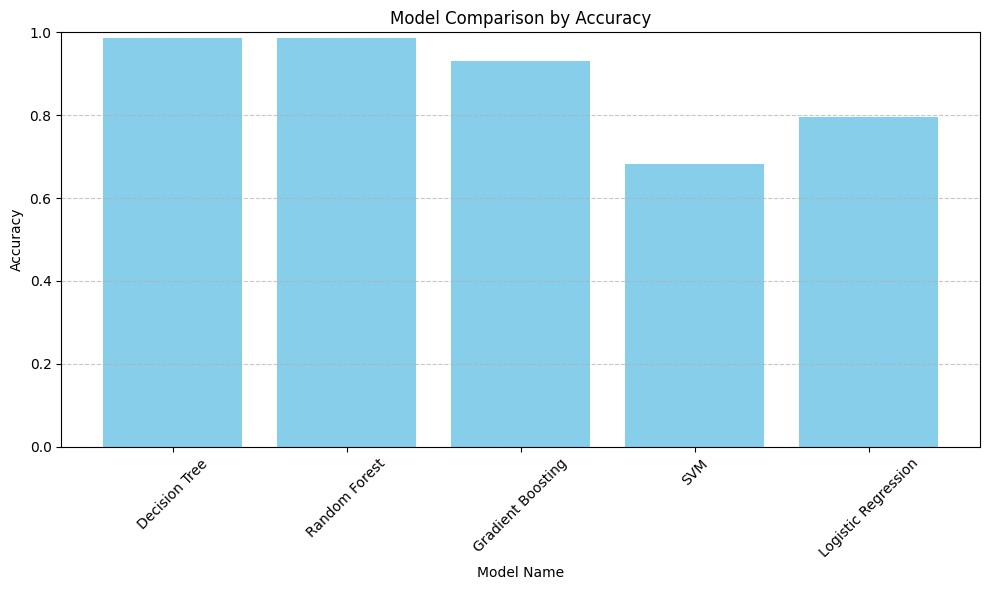

In [26]:
import matplotlib.pyplot as plt

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.title('Model Comparison by Accuracy')
plt.ylim(0, 1)  # Accuracy range is 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
